In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == 6).all()
# print(june_temp)


In [5]:
#  3. Convert the June temperatures to a list.
june_temp_list = session.query(Measurement.tobs).\
filter(extract('month',Measurement.date) == 6).all()
# print(june_temp_list)


In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temp_list, columns=['June Temps'])
print(june_df)


      June Temps
0           78.0
1           76.0
2           78.0
3           76.0
4           77.0
...          ...
1695        79.0
1696        74.0
1697        74.0
1698        76.0
1699        75.0

[1700 rows x 1 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temp = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == 12).all()
# print(december_temp)


In [9]:
# 7. Convert the December temperatures to a list.
december_temp_list = session.query(Measurement.tobs).\
filter(extract('month',Measurement.date) == 12).all()
# print(december_temp_list)


In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_temp_list, columns=['December Temps'])
# print(december_df)


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()


,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
# June precipitation and temperature data
june_prcp_temp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) == 6).all()

june_prcp_temp_list = session.query(Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) == 6).all()

juneprcptemp_df = pd.DataFrame(june_prcp_temp_list, columns=['June Precipitation', 'June Temps'])
juneprcptemp_df.describe()


,June Precipitation,June Temps
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [13]:
# December precipitation and temperature data
dec_prcp_temp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) == 12).all()

dec_prcp_temp_list = session.query(Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) == 12).all()

decprcptemp_df = pd.DataFrame(dec_prcp_temp_list, columns=['December Precipitation', 'December Temps'])
decprcptemp_df.describe()


,December Precipitation,December Temps
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


(0.0, 400.0)

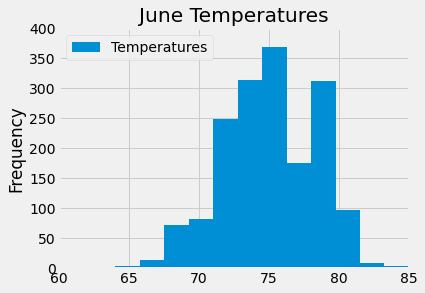

In [21]:
# June temperature histogram
june_df = pd.DataFrame(june_temp_list, columns=['Temperatures'])
june_df.plot.hist(bins=12)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([60, 85])
plt.ylim([0, 400])


(0.0, 400.0)

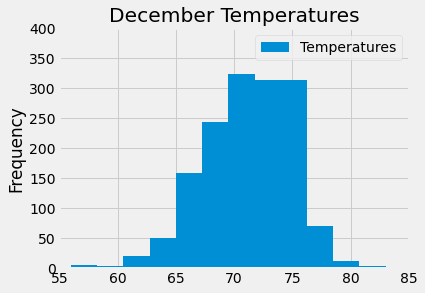

In [23]:
# December temperature histogram
december_df = pd.DataFrame(december_temp_list, columns=['Temperatures'])
december_df.plot.hist(bins=12)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55, 85])
plt.ylim([0, 400])
